In [1]:
import numpy as np
import healpy as hp
from rubin_sim.scheduler.surveys import generate_dd_surveys, Deep_drilling_survey
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import _hpid2RaDec, _angularSeparation
import rubin_sim.maf as maf

In [2]:
ddf_surveys = generate_dd_surveys()
#ddf_surveys = [ddf for ddf in ddf_surveys if ddf.survey_name != "DD:EDFS"]
# Add on the Euclid field as one



#ddf_surveys.append(
#    Deep_drilling_survey([], 58.97, -49.28, survey_name="DD:EDFSa")
#)
#ddf_surveys.append(
#    Deep_drilling_survey([], 63.6, -47.60, survey_name="DD:EDFSb")
#)

In [3]:
nside = 256
ra,dec = _hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))

In [4]:
bundle_list = []
sql = ''
radius = np.radians(5.)

plotFuncs = [maf.HealpixSkyMap()]

for ddf in ddf_surveys[0:2]:
    plotDict = {'visufunc': hp.gnomview,
               'rot': (np.degrees(np.mean(ddf.ra)), np.degrees(np.mean(ddf.dec)), 0),
               'xsize': 500}
    dist = _angularSeparation(ra, dec, np.mean(ddf.ra), np.mean(ddf.dec))
    good = np.where(dist <= radius)[0]
    slicer = maf.HealpixSubsetSlicer(nside, good)
    metric = maf.metrics.SNNSNMetric(verbose=False, metricName='%s, SNe' % ddf.survey_name.replace('DD:', ''))
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs))

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading

Querying table None with no constraint for columns ['fiveSigmaDepth', 'observationId', 'fieldDec', 'numExposures', 'observationStartMJD', 'visitTime', 'visitExposureTime', 'filter', 'rotSkyPos', 'fieldRA', 'night'].
Found 2081749 visits
Running:  ['opsim_ELAISS1_SNe_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 256 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running:  ['opsim_XMM-LSS_SNe_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 256 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Running summary statistics.
Completed.
Plotting figures with "" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.


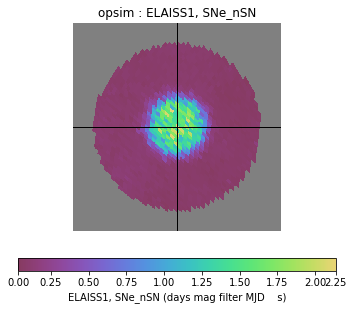

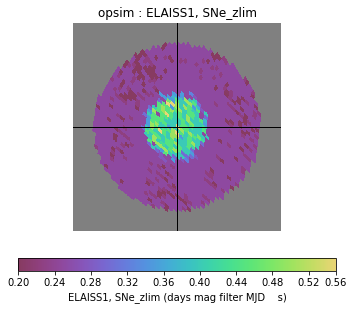

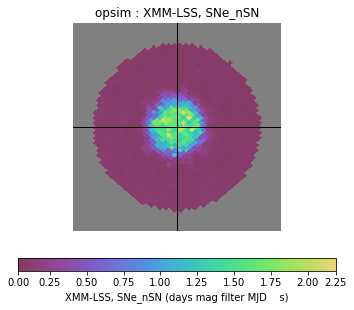

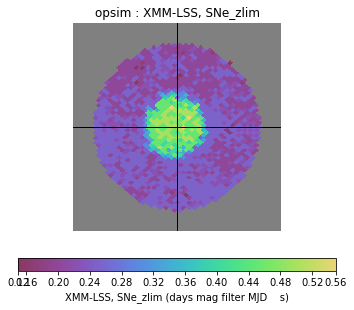

In [5]:
outDir = "temp"
resultsDb = maf.db.ResultsDb(outDir=outDir)

bd = maf.metricBundles.makeBundlesDictFromList(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, 'baseline_v2.1_10yrs.db', outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

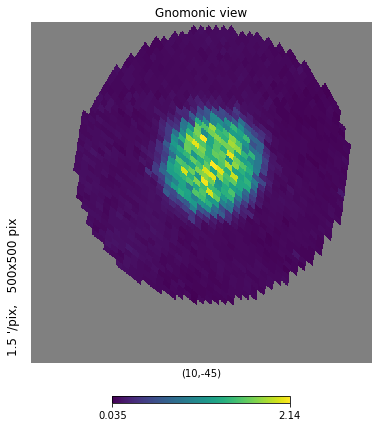

In [6]:


hp.gnomview(bd['ELAISS1, SNe_nSN'].metricValues, rot=(10,-45,0), xsize=500)